1. What are the 1st most common and the 2nd most common nested relations *and* 
2. What is their depth (distance from [N] of the main relation)?

Check the following:
- Attribution
- Explanation
- Contrast
- Background
- Evaluation
- Condition
- Topic-comment



Example of the Result: 
{Attribution [N]: 
{Background: [[depth 1, 70 times], [depth 2, 45 times]]}, 
{Explanation: [[depth 2, 50 times], [depth 5, 15 times]]}}

In [2]:
# nested_relations = [they will be the KEYS in a dict]
# value will be a list of lists [[depth, times],[depth, times]]

In [10]:
from collections import defaultdict

In [85]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

In [20]:
%run ./utils.ipynb
%run ./relation_extraction.ipynb

In [46]:
def traverse(rel, cur_path, rel_counts):
    if rel is not None:
        cur_depth = len(cur_path)
        for depth, prev_rel in enumerate(cur_path):
            rel_counts[
                (prev_rel.type, rel.type, cur_depth - depth)
            ] += 1
        cur_path.append(rel)
        traverse(rel.left_child, cur_path, rel_counts)
        traverse(rel.right_child, cur_path, rel_counts)
        cur_path.pop()

In [61]:
def counts_to_table(rel_counts):
    return pd.DataFrame(
        [key + (cnt,) for key, cnt in dict(rel_counts).items()],
        columns=["relation", "nested", "depth", "count"]
    )

In [63]:
DIRECTORY = "parsed/race/train/middle"

def count_relations():
    rel_counts = defaultdict(int)
    for file_name in os.listdir(DIRECTORY):
        path = os.path.join(DIRECTORY, file_name)
        tree = extract_relation_tree(path)
        traverse(tree, [], rel_counts)
    return counts_to_table(rel_counts)

cnt_df = count_relations()

In [171]:
def plot_counts(relation_type, cnt_df):
    df = cnt_df.loc[cnt_df.relation == relation_type][
        ["nested", "depth", "count"]
    ].set_index(["depth", "nested"]).unstack("depth").fillna(0).T

    df.index = df.index.droplevel()
    
    dir_suffix = "/".join(DIRECTORY.strip("/").split("/")[-2:])
    title = "Nested Relation Counts at Varying Depths "\
            "Relative to " + r"$\bf{" + relation_type + "}$\n"\
            f"({dir_suffix})"
    fig, ax = plt.subplots(figsize=(10, 5))
    
    cols = [
        c for c in [
            "Attribution",
            "Explanation",
            "Contrast",
            "Background",
            "Evaluation",
            "Condition",
            "Topic-Comment",
            "Elaboration",
            "Joint",
            "Enablement",
            "Temporal",
            "Cause",
            "Summary",
            "same-unit"
            
        ] if c in df.columns
    ]
    df[cols].plot(
        kind='bar', 
        stacked=True, 
        title=title,
        ax=ax)
    
    plt.show()

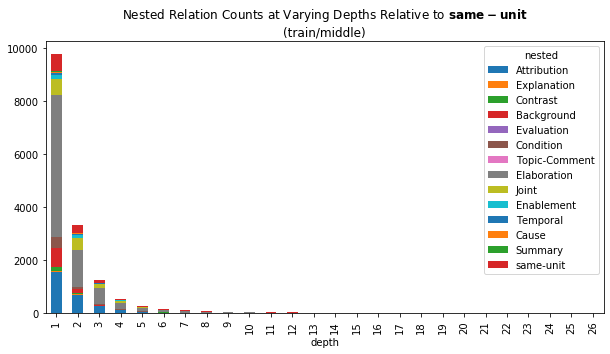

In [172]:
plot_counts("same-unit", cnt_df)

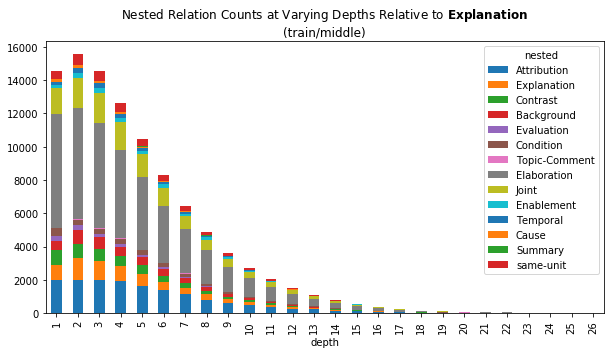

In [173]:
plot_counts("Explanation", cnt_df)

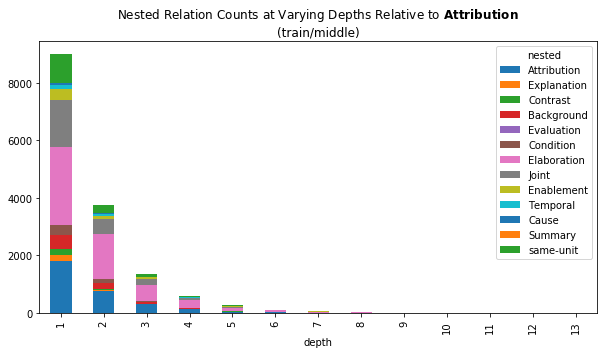

In [174]:
plot_counts("Attribution", cnt_df)

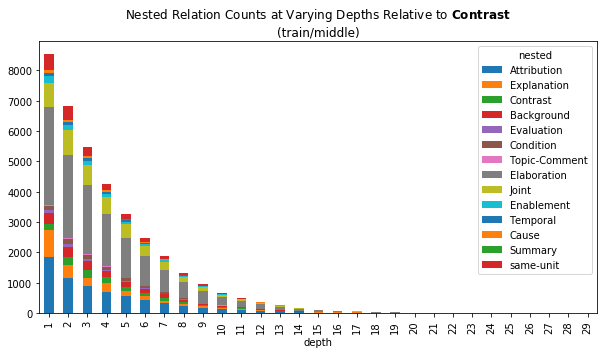

In [175]:
plot_counts("Contrast", cnt_df)

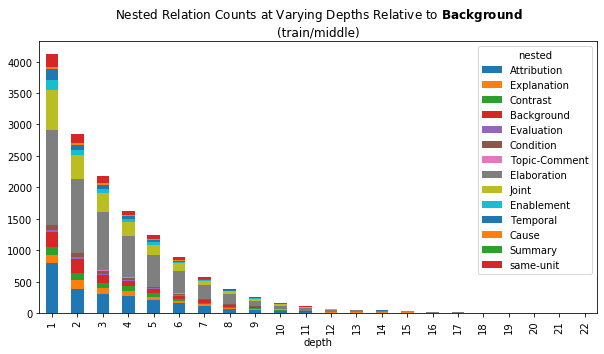

In [176]:
plot_counts("Background", cnt_df)

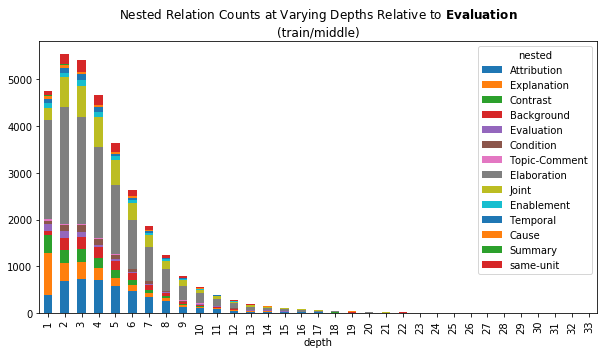

In [177]:
plot_counts("Evaluation", cnt_df)

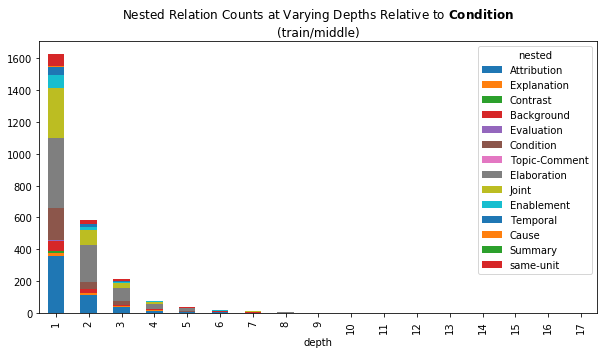

In [178]:
plot_counts("Condition", cnt_df)

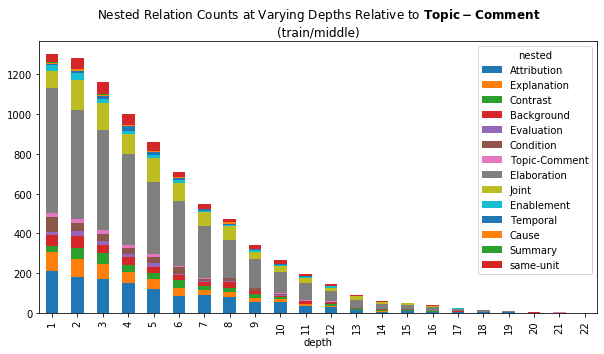

In [179]:
plot_counts("Topic-Comment", cnt_df) 

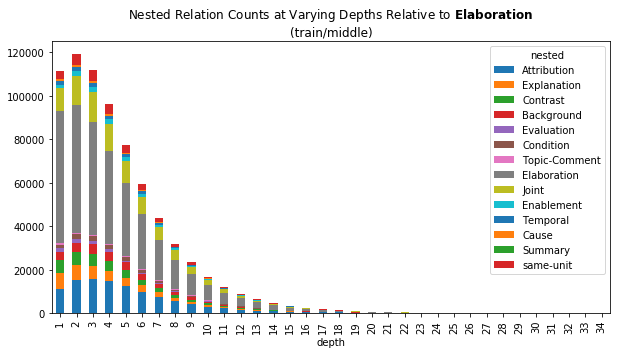

In [180]:
plot_counts("Elaboration", cnt_df) 

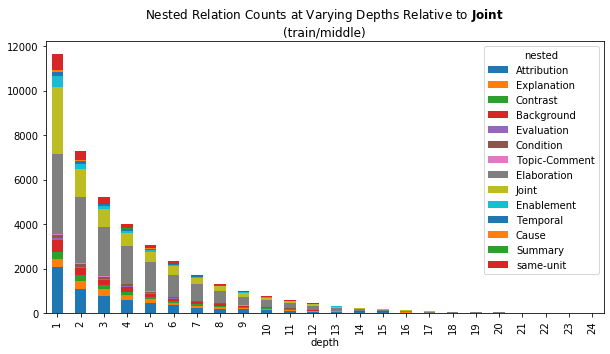

In [181]:
plot_counts("Joint", cnt_df) 

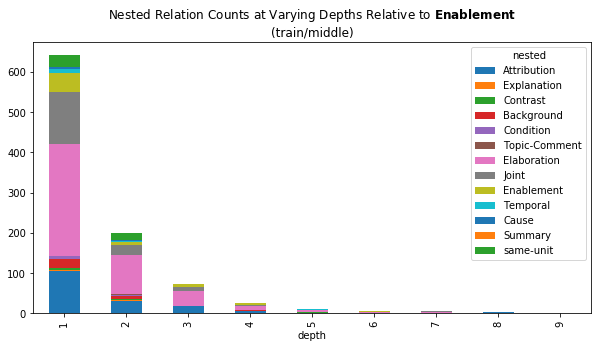

In [182]:
plot_counts("Enablement", cnt_df) 

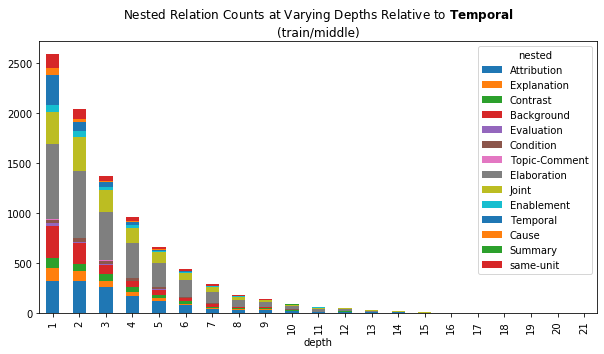

In [183]:
plot_counts("Temporal", cnt_df) 

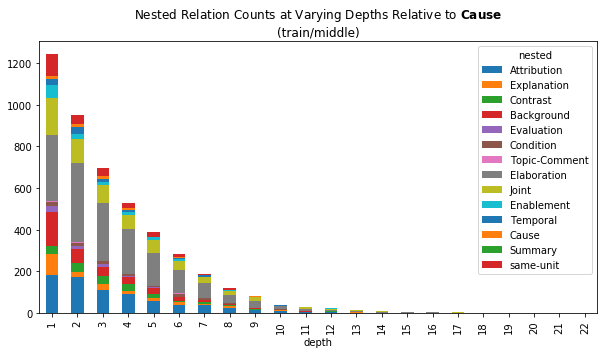

In [184]:
plot_counts("Cause", cnt_df) 

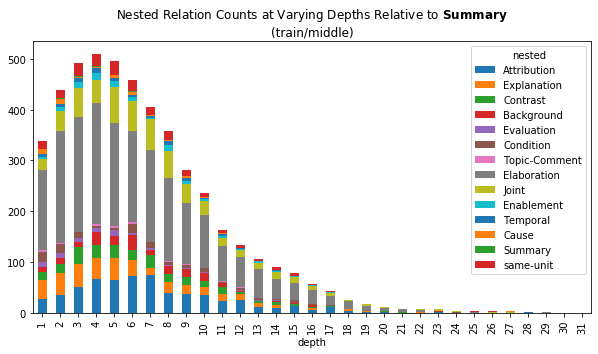

In [185]:
plot_counts("Summary", cnt_df) 